In [1]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings('ignore') 

from collections import Counter
from sklearn.decomposition import PCA
import pylab

In [2]:
df = pd.read_csv('encoded_df.csv')


In [3]:
df = df.drop(df[df.home_results > 2].index)

In [4]:
df = df.drop(columns=['Pts.1', 'null', 'half', 'quart', 'three_quart'])

In [5]:
test = df.iloc[766:]
train = df.iloc[:766]

In [6]:
X_train = train.drop(columns=['Pts'])
X_test = test.drop(columns=['Pts'])

y_train = train['Pts']
y_test = test['Pts']

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from IPython.display import display

In [8]:
df.head()

,Wk,Winner,Pts,Loser,winners,losers,home_rank,away_rank,home_team_code,away_team_code,home_results,win_rank,lose_rank,day_code,hours
0,1,Florida Atlantic,43,Charlotte,Florida Atlantic,Charlotte,99,99,32,37,0,99,99,5,19
1,1,Florida State,47,Duquesne,Florida State,Duquesne,99,99,34,49,0,99,99,5,17
2,1,Illinois,38,Wyoming,Illinois,Wyoming,99,99,42,224,0,99,99,5,16
3,1,Nevada,23,New Mexico State,Nevada,New Mexico State,99,99,76,122,1,99,99,5,22
4,1,Nevada-Las Vegas,52,Idaho State,Nevada-Las Vegas,Idaho State,99,99,74,77,0,99,99,5,15


In [9]:
df.columns

Index(['Wk', 'Winner', 'Pts', 'Loser', 'winners', 'losers', 'home_rank',
       'away_rank', 'home_team_code', 'away_team_code', 'home_results',
       'win_rank', 'lose_rank', 'day_code', 'hours'],
      dtype='object')

array([[<AxesSubplot:xlabel='Wk', ylabel='Wk'>,
        <AxesSubplot:xlabel='Pts', ylabel='Wk'>,
        <AxesSubplot:xlabel='home_rank', ylabel='Wk'>,
        <AxesSubplot:xlabel='away_rank', ylabel='Wk'>,
        <AxesSubplot:xlabel='home_team_code', ylabel='Wk'>,
        <AxesSubplot:xlabel='away_team_code', ylabel='Wk'>,
        <AxesSubplot:xlabel='home_results', ylabel='Wk'>,
        <AxesSubplot:xlabel='win_rank', ylabel='Wk'>,
        <AxesSubplot:xlabel='lose_rank', ylabel='Wk'>,
        <AxesSubplot:xlabel='day_code', ylabel='Wk'>,
        <AxesSubplot:xlabel='hours', ylabel='Wk'>],
       [<AxesSubplot:xlabel='Wk', ylabel='Pts'>,
        <AxesSubplot:xlabel='Pts', ylabel='Pts'>,
        <AxesSubplot:xlabel='home_rank', ylabel='Pts'>,
        <AxesSubplot:xlabel='away_rank', ylabel='Pts'>,
        <AxesSubplot:xlabel='home_team_code', ylabel='Pts'>,
        <AxesSubplot:xlabel='away_team_code', ylabel='Pts'>,
        <AxesSubplot:xlabel='home_results', ylabel='Pts'>,
        

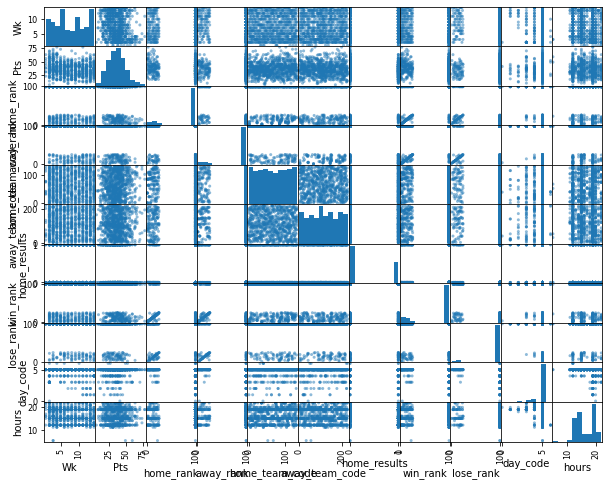

In [10]:
from pandas.plotting import scatter_matrix
attributes = ['Wk', 'Winner', 'Pts', 'Loser', 'winners', 'losers',
       'home_rank', 'away_rank', 'home_team_code', 'away_team_code',
       'home_results', 'win_rank', 'lose_rank', 'day_code', 'hours']
scatter_matrix(df[attributes], figsize = (10,8))

In [11]:
from pycaret.regression import *

In [12]:
s = setup(df, target = 'Pts',  fold_shuffle=True, session_id=2, 
          remove_multicollinearity = True, 
          multicollinearity_threshold = 0.95, imputation_type='iterative')



,Description,Value
0,session_id,2
1,Target,Pts
2,Original Data,"(829, 15)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(580, 303)"


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [14]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,9.2214,133.5600,11.5312,0.0785,0.3423,0.3155,0.0180
gbr,Gradient Boosting Regressor,9.2193,133.5731,11.5323,0.0765,0.3401,0.3121,0.0570
catboost,CatBoost Regressor,9.2929,133.6208,11.5417,0.0729,0.3380,0.3086,0.3680
rf,Random Forest Regressor,9.2508,134.7108,11.5823,0.0677,0.3410,0.3145,0.1520
ada,AdaBoost Regressor,9.4222,140.2538,11.8195,0.0324,0.3492,0.3220,0.0280
en,Elastic Net,9.4474,141.7926,11.8847,0.0214,0.3527,0.3266,0.0140
lasso,Lasso Regression,9.4710,142.9440,11.9335,0.0134,0.3540,0.3276,0.2960
lightgbm,Light Gradient Boosting Machine,9.5995,144.7563,12.0074,-0.0002,0.3515,0.3222,0.1400
huber,Huber Regressor,9.6594,144.7994,12.0007,-0.0027,0.3511,0.3191,0.0720
llar,Lasso Least Angle Regression,9.5951,146.4375,12.0782,-0.0099,0.3572,0.3322,0.0070


In [15]:
print(best)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize='deprecated', tol=0.001, verbose=False)


In [16]:
evaluate_model(best)

,Parameters
alpha_1,1e-06
alpha_2,1e-06
alpha_init,None
compute_score,False
copy_X,True
fit_intercept,True
lambda_1,1e-06
lambda_2,1e-06
lambda_init,None
n_iter,300


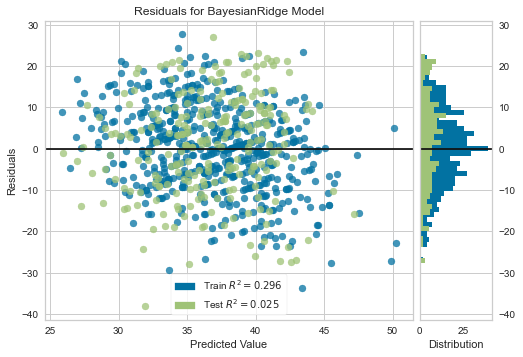

In [17]:
plot_model(best, plot = 'residuals')

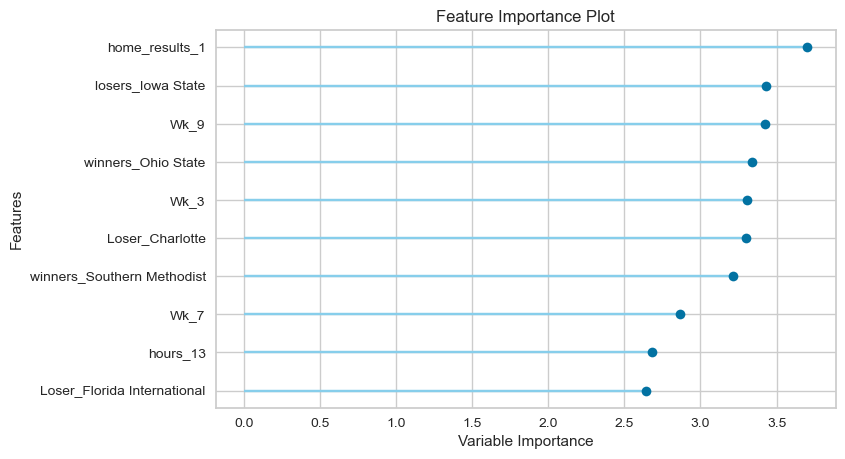

In [18]:
plot_model(best, plot = 'feature')

In [19]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,10.1213,151.0227,12.2891,0.0252,0.3676,0.3571


,home_rank,away_rank,home_team_code,away_team_code,win_rank,lose_rank,Wk_1,Wk_10,Wk_11,Wk_12,...,hours_16,hours_17,hours_18,hours_19,hours_20,hours_21,hours_22,hours_5,Pts,Label
0,14.0,99.0,90.0,103.0,14.0,99.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,40.406578
1,99.0,99.0,25.0,202.0,99.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,36.981148
2,99.0,9.0,121.0,114.0,9.0,99.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,36.749294
3,99.0,99.0,118.0,5.0,99.0,99.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,42.753441
4,99.0,20.0,39.0,114.0,20.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,41.302174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,99.0,99.0,3.0,67.0,99.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,40.809715
245,99.0,10.0,5.0,173.0,10.0,99.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,45.0,37.659737
246,16.0,99.0,61.0,20.0,16.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,42.600426
247,99.0,99.0,27.0,182.0,99.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,36.235477


In [20]:
predictions = predict_model(best, data=df)
predictions.head()

,Wk,Winner,Pts,Loser,winners,losers,home_rank,away_rank,home_team_code,away_team_code,home_results,win_rank,lose_rank,day_code,hours,Label
0,1,Florida Atlantic,43,Charlotte,Florida Atlantic,Charlotte,99,99,32,37,0,99,99,5,19,41.831242
1,1,Florida State,47,Duquesne,Florida State,Duquesne,99,99,34,49,0,99,99,5,17,40.144833
2,1,Illinois,38,Wyoming,Illinois,Wyoming,99,99,42,224,0,99,99,5,16,36.488899
3,1,Nevada,23,New Mexico State,Nevada,New Mexico State,99,99,76,122,1,99,99,5,22,34.855446
4,1,Nevada-Las Vegas,52,Idaho State,Nevada-Las Vegas,Idaho State,99,99,74,77,0,99,99,5,15,42.418922


In [ ]:
save_model(best, 'the_best')

# Wouldn't work in jupyter - results are from colab

### INFO:logs:Initializing save_model()
### INFO:logs:save_model(model=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False), model_name=the_best, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Pts',
                                      time_features=[])),
                ('imputer',
                 Iterative_Imputer(add_indicator=False,
                                   classifier=LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                                             colsample_bytree=1.0,
                                                             im...
                ('dummy', Dummify(target='Pts')),
                ('fix_perfect', Remove_100(target='Pts')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'),
                ('fix_multi',
                 Fix_multicollinearity(correlation_with_target_preference=None,
                                       correlation_with_target_threshold=0.0,
                                       target_variable='Pts', threshold=0.95)),
                ('dfs', 'passthrough'), ('pca', 'passthrough')],
         verbose=False), verbose=True, kwargs={})
### INFO:logs:Adding model into prep_pipe
### INFO:logs:the_best.pkl saved in current working directory
### INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Pts',
                                      time_features=[])),
                ('imputer',
                 Iterative_Imputer(add_indicator=False,
                                   classifier=LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                                             colsample_bytree=1.0,
                                                             im...
                                       correlation_with_target_threshold=0.0,
                                       target_variable='Pts', threshold=0.95)),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                               compute_score=False, copy_X=True,
                               fit_intercept=True, lambda_1=1e-06,
                               lambda_2=1e-06, lambda_init=None, n_iter=300,
                               normalize=False, tol=0.001, verbose=False)]],
         verbose=False)
### INFO:logs:save_model() successfully completed......................................

### Transformation Pipeline and Model Successfully Saved

### (Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Pts',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type='gbdt',
                                                              class_weight=None,
                                                              colsample_bytree=1.0,
                                                              im...
                                        correlation_with_target_threshold=0.0,
                                        target_variable='Pts', threshold=0.95)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                                compute_score=False, copy_X=True,
                                fit_intercept=True, lambda_1=1e-06,
                                lambda_2=1e-06, lambda_init=None, n_iter=300,
                                normalize=False, tol=0.001, verbose=False)]],
          verbose=False), 'the_best.pkl')